In [109]:
from sbcbinaryformat import Streamer, Writer
import numpy as np
import matplotlib.pyplot as plt

from GetEvent import GetEvent

from ana import AcousticT0 
from scipy.signal import firwin, filtfilt
from scipy.optimize import least_squares
import importlib

In [110]:
importlib.reload(AcousticT0)

<module 'ana.AcousticT0' from '/exp/e961/app/users/runze/projects/LAr10Ana/ana/AcousticT0.py'>

In [111]:
# TEST_RUN2 = "/exp/e961/data/SBC-25-daqdata/20250611_1/"
TEST_RUN2 = "/exp/e961/app/users/runze/data/20251121_5/"
# TEST_RUN2 = "/exp/e961/app/users/runze/data/20251211_6/"
# TEST_RUN2 = "/exp/e961/data/users/gputnam/SBC-25-daqdata-test/20251103_1/"
TEST_EVT =8

In [112]:
data = GetEvent(TEST_RUN2, TEST_EVT,strictMode=False)
data.keys()


dict_keys(['acoustics', 'scintillation', 'cam', 'event_info', 'plc', 'slow_daq', 'run_info', 'run_control'])

In [113]:
wvfs = data["acoustics"]["Waveforms"]
wvfs.shape

(1, 8, 950001)

In [114]:
np.float64([[1e2, 1e3, 1e4, 1e5]]).shape

(1, 4)

In [115]:
# plot the first triggered waveform in each channel
# if channel 7 raw reading is ADC -35/1e4
# if channel 7 raw reading is bits, -35/2**15
# MB.PT1101 := AIn.PT1101 * (-35.0* el3052bits);
wvfs_psi = wvfs*(-35/2**16)
# wvfs_psi = wvfs*(-35/1e4)

# for channel in range(wvfs.shape[1]):
#     plt.plot(wvfs_psi[0, channel, :],label="channel"+str(channel))
#     #plt.plot(wvfs[0, channel, :],label="channel"+str(channel))
# plt.legend()
# plt.xlabel("time/microseconds")
# plt.ylabel("pressure/psi")
# channel 0 hydraulic trigger 15bits
# channel 1-6 acoustic
# channel 7, PT 
# that is when compress happens, and with a delay, the pressure drops

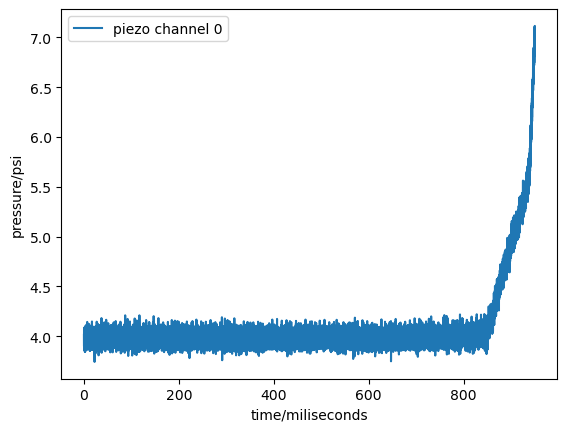

In [116]:
piezo0 = wvfs_psi[0, 7, :]
xlimit = [0, 800]
ylimit = [-22.5,-20]
ylimit = [-20,-18]
# time in miliseconds
total_time = len(piezo0)
time_list_ms = [i/1e3 for i in range(0,total_time,1)]


# plt.plot(time_list_ms,piezo0, label="piezo channel 0")
# plt.xlabel("time/miliseconds")
# plt.ylabel("pressure/psi")
# # plt.xlim(xlimit)
# # plt.ylim(ylimit)
# plt.legend()

In [117]:
# check if a stable expansion
# check 2 points 0, 600ms 
# average the 100 points for each points
# compare pressure change is less than 0.5 bara as true(successful expansion)
average_window = 100
start_pressure = np.mean(piezo0[:average_window])
end_pressure = np.mean(piezo0[600000:600000+average_window])
if start_pressure-end_pressure<0.5:
    print(True)
else:
    print(False)

True


In [ ]:
def single_check()